In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Activity Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import pandas as pd
import glob
image_paths1=glob.glob('/tmp/Activity Dataset/Sitting/*')
image_paths2=glob.glob('/tmp/Activity Dataset/Standing/*')
image_paths3=glob.glob('/tmp/Activity Dataset/sleeping/*')
image_paths4=glob.glob('/tmp/Activity Dataset/walking/*')
#image_paths5=glob.glob('/tmp/Activity Dataset/Stairs/*')
df_sit=pd.DataFrame({'image':image_paths1 , 'label':'sitting'})
df_stand=pd.DataFrame({'image':image_paths2 , 'label':'standing'})
df_sleep=pd.DataFrame({'image':image_paths3 , 'label':'sleeping'})
df_walk=pd.DataFrame({'image':image_paths4 , 'label':'walking'})
#df_stairs=pd.DataFrame({'image':image_paths5 , 'label':'stairs'})

print(df_sit)
print(df_stand)
print(df_sleep)
print(df_walk)
#print(df_stairs)

                                                 image    label
0             /tmp/Activity Dataset/Sitting/img132.jpg  sitting
1             /tmp/Activity Dataset/Sitting/img684.jpg  sitting
2             /tmp/Activity Dataset/Sitting/img731.jpg  sitting
3             /tmp/Activity Dataset/Sitting/img510.jpg  sitting
4              /tmp/Activity Dataset/Sitting/img99.jpg  sitting
..                                                 ...      ...
598           /tmp/Activity Dataset/Sitting/img298.jpg  sitting
599           /tmp/Activity Dataset/Sitting/img282.jpg  sitting
600  /tmp/Activity Dataset/Sitting/jannis-lucas-KgD...  sitting
601  /tmp/Activity Dataset/Sitting/christina-wocint...  sitting
602  /tmp/Activity Dataset/Sitting/gettyimages-2005...  sitting

[603 rows x 2 columns]
                                         image     label
0    /tmp/Activity Dataset/Standing/img559.jpg  standing
1    /tmp/Activity Dataset/Standing/img132.jpg  standing
2    /tmp/Activity Dataset/Standing/i

In [ ]:
df = pd.concat([df_sit ,df_stand,df_sleep,df_walk])


In [ ]:
df.label.value_counts()

,count
label,
walking,927
sleeping,753
standing,709
sitting,603


In [ ]:
df.shape

(2992, 2)

In [ ]:
df['target'] = df['label'].map({
    'sitting': 0,
    'standing': 1,
    'sleeping': 2,
    'walking': 3,# New class
    #'stairs':4
})


In [ ]:
df.isnull().sum()

,0
image,0
label,0
target,0


In [ ]:
df

,image,label,target
0,/tmp/Activity Dataset/Sitting/img132.jpg,sitting,0
1,/tmp/Activity Dataset/Sitting/img684.jpg,sitting,0
2,/tmp/Activity Dataset/Sitting/img731.jpg,sitting,0
3,/tmp/Activity Dataset/Sitting/img510.jpg,sitting,0
4,/tmp/Activity Dataset/Sitting/img99.jpg,sitting,0
...,...,...,...
922,/tmp/Activity Dataset/walking/img226 (2).jpg,walking,3
923,/tmp/Activity Dataset/walking/img282.jpg,walking,3
924,/tmp/Activity Dataset/walking/bulksplash-ohhbe...,walking,3
925,/tmp/Activity Dataset/walking/img254 (2).jpg,walking,3


In [ ]:
from sklearn.model_selection import train_test_split, KFold, GroupKFold, StratifiedKFold, StratifiedGroupKFold
train_df, val_df = train_test_split(df, test_size=0.3, shuffle=True, stratify=df['label'])


In [ ]:



import os
import glob
import random
import numpy as np

import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.17.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm
from PIL import Image

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

# Verify TensorFlow version
print("TensorFlow version:", tf.__version__)

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)



TensorFlow version: 2.17.1


In [ ]:
from PIL import Image

img_data = []
img_label = []

for i in range(len(df)):
    img_path = df.iloc[i]['image']
    label = df.iloc[i]['label']

    try:
        # Load image
        img = Image.open(img_path)

        # Resize image
        img = img.resize((224, 224))

        # Convert image to numpy array
        img_array = np.array(img)

        # Check if image has 3 channels (RGB)
        if len(img_array.shape) == 3 and img_array.shape[2] == 3:
            # Append image data and label
            img_data.append(img_array)
            img_label.append(label)
        else:
            print(f"Skipping image {img_path} due to incorrect shape: {img_array.shape}")

    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# Convert lists to numpy arrays
img_data = np.array(img_data)
img_label = np.array(img_label)


In [ ]:
img_shape= (224,224,3)

In [ ]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(df["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0.]


In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
import os

img_data = []
img_label = []

for i in range(len(df)):
    img_path = df.iloc[i]['image']

    # Extract label from image path
    label_parts = img_path.split(os.path.sep)  # Using os.path.sep as delimiter for better cross-platform compatibility
    if len(label_parts) >= 2:  # Check if the path has at least two parts
        label = label_parts[-2]  # Get the second-to-last part as the label
        label = label.lower()  # Convert label to lowercase if necessary
    else:
        print(f"Skipping image {img_path} due to incorrect path structure")
        continue

    try:
        # Load image
        img = Image.open(img_path)

        # Resize image
        img = img.resize((224, 224))

        # Convert image to numpy array
        img_array = np.array(img)

        # Check if image has 3 channels (RGB)
        if len(img_array.shape) == 3 and img_array.shape[2] == 3:
            # Append image data and label
            img_data.append(img_array)
            img_label.append(label)
        else:
            print(f"Skipping image {img_path} due to incorrect shape: {img_array.shape}")

    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# Convert lists to numpy arrays
img_data = np.array(img_data)
img_label = np.array(img_label)

# Convert labels to categorical
y_train = to_categorical(np.asarray([df["label"].factorize()[0][i] for i in range(len(df))]), num_classes=4)

# Check the lengths of img_data and y_train
print("Length of img_data:", len(img_data))
print("Length of y_train:", len(y_train))

# Now, the lengths should match


Length of img_data: 2992
Length of y_train: 2992


In [ ]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(224,224,3),
                                            pooling ="avg",classes=4,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(4,activation="softmax"))

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from fastai.vision.all import *
path = Path("/tmp/Activity Dataset")
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
get_y=parent_label,
splitter=RandomSplitter(seed=42),
item_tfms=Resize(224))
dls = dblock.dataloaders(path, bs=64)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
# Fine-tune the model
learn.fine_tune(10)
learn.recorder.plot_loss()
learn.export("/tmp/activity_model.pkl")
efficientnet_model = Sequential()
model = tf.keras.applications.EfficientNetB7(include_top=False,input_shape=(224,224,3),pooling ="avg",classes=4,weights="imagenet")
for layer in model.layers:
layer.trainable=False
efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(4,activation="softmax"))
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metric
s=["accuracy"])
efficientnet_model.summary()

In [ ]:
history = efficientnet_model.fit(iii,y_train,epochs=40)

Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 143s 654ms/step - accuracy: 0.7469 - loss: 0.5909
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 217ms/step - accuracy: 0.9110 - loss: 0.2411
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.9392 - loss: 0.1605
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 229ms/step - accuracy: 0.9581 - loss: 0.1293
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.9743 - loss: 0.0875
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - accuracy: 0.9804 - loss: 0.0593
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.9897 - loss: 0.0361
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - accuracy: 0.9821 - loss: 0.0548
Epoch 9/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9889 - loss: 0.0456
Epoch 10/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.9860 - loss: 0.0446
Epoch 11/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9903 - loss: 0.0256
Epoch 12/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 4

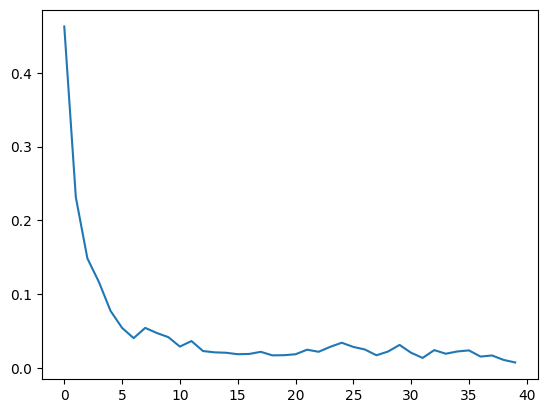

In [ ]:
losses = history.history["loss"]
plt.plot(losses)

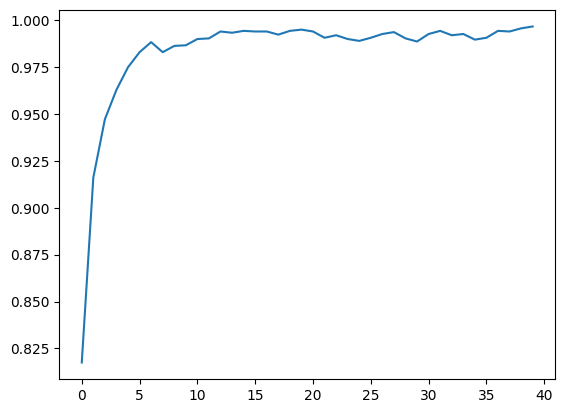

In [ ]:
acc = history.history['accuracy']
plt.plot(acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


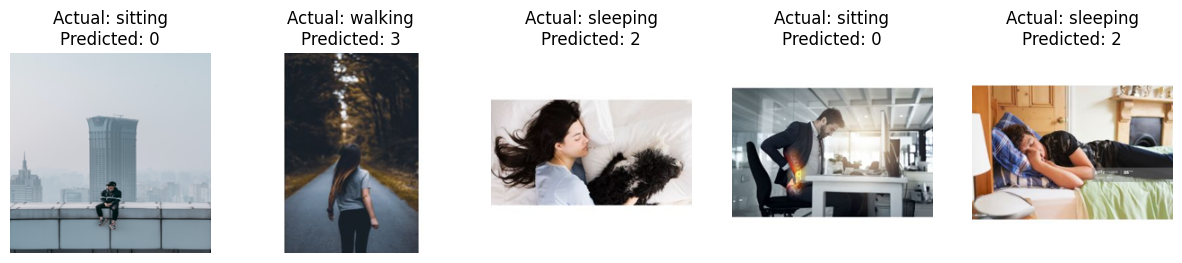

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# 1. Generate predictions
predictions = efficientnet_model.predict(iii)

# 2. Compute confusion matrix
'''cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(predictions, axis=1))

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=['sitting', 'standing', 'sleeping', 'walking'], normalize=True)'''

# 3. Choose some random images and their corresponding labels from the test set
random_indices = np.random.choice(len(iii), size=5, replace=False)
sample_images = iii[random_indices]
sample_labels_actual = img_label[random_indices]

# 4. Make predictions for these images
sample_predictions = efficientnet_model.predict(sample_images)
sample_labels_predicted = np.argmax(sample_predictions, axis=1)

# 5. Plot the images along with their actual and predicted labels
plt.figure(figsize=(15, 6))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Actual: {sample_labels_actual[i]}\nPredicted: {sample_labels_predicted[i]}')
    plt.axis('off')

plt.show()


29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 635ms/step


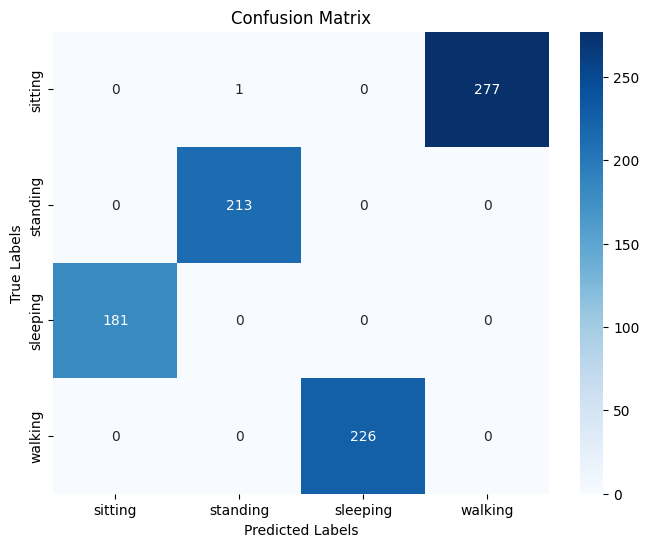

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a test dataset called test_df
# Preprocess the test data
test_img_data = []
test_img_label = []

for i in range(len(val_df)):
    img_path = val_df.iloc[i]['image']

    label_parts = img_path.split(os.path.sep)
    if len(label_parts) >= 2:
        label = label_parts[-2]
        label = label.lower()
    else:
        print(f"Skipping image {img_path} due to incorrect path structure")
        continue

    try:
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img_array = np.array(img)

        if len(img_array.shape) == 3 and img_array.shape[2] == 3:
            test_img_data.append(img_array)
            test_img_label.append(label)
        else:
            print(f"Skipping image {img_path} due to incorrect shape: {img_array.shape}")

    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# Convert lists to numpy arrays
test_img_data = np.array(test_img_data)
test_img_label = np.array(test_img_label)

# Convert labels to categorical
y_test = to_categorical(np.asarray([val_df["label"].factorize()[0][i] for i in range(len(val_df))]), num_classes=4)

# Predict on the test data
predictions = efficientnet_model.predict(test_img_data)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['sitting', 'standing', 'sleeping', 'walking'], yticklabels=['sitting', 'standing', 'sleeping', 'walking'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
